# Titanic Kaggle EDA Notebook

This notebook is for EDA of the titanic dataset. It's purpose is for me to get
some practice doing data cleaning and feature engineering in Python and pandas.

The task in this classic competition is to predict the survival of passengers
on the Titanic. The data are split into a training set and a test set that will
be the prediction target.

## Dependencies and data

First things first, we need to load dependencies and read in the data. 

In [45]:
import os
import pandas as pd
import numpy as np
import re # regular expressions

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

Because this is a Kaggle competition, the data are split into a training set and
a target set for us. I want to read both in for the purposes of EDA and 
backfilling, but will split them out again for training and prediction.

In [46]:
train_raw = pd.read_csv(os.path.join("data", "train.csv"))
train_raw['target'] = False
train_raw['Survived'] = [bool(s) for s in train_raw['Survived']]
train_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,target
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False


In [47]:
target_raw = pd.read_csv(os.path.join('data', 'target.csv'))
target_raw['target'] = True
target_raw['Survived'] = None
target_raw

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,target,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,True,None
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True,None
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,True,None
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,True,None
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,True,None
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True,None
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,True,None
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,True,None


In [48]:
comb_raw = pd.concat([train_raw, target_raw], axis = 0)
comb_raw.reset_index(inplace=True, drop=True)
comb_raw

/opt/homebrew/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/opt/homebrew/lib/python3.10/site-packages/IPython/core/formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,target
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,True
1305,1306,None,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True
1306,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,True
1307,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,True


## Explore fields

The next step is to do some data cleaning. The purpose here is really twofold.
First, there are just doubtless some missing values, typos, bad values, etc.
that I want to clean up in order to be able to use them in prediction.
Second, I want to better understand the structure of the data in order to begin
to develop some hypotheses regarding what might be predictive of survival, and
how to structure a model.

This will take the form of going through the variables in the dataset 
one-by-one. For each variable, I want to:

- identify missing information
- plot the data
- figure out what values it makes sense to backfill with
- backfill missing information

Another small bit of housekeeping to begin with - I find it annoying to work
with capitalized field names, so we'll first switch all the names to lower case
and simplify some of them. I also find it much more convenient to work with 
Boolean 1 / 0 values rather than two-class factors.

So in the next section I will:

- make columns lower case
- change the `sex` variable from a categorical to Boolean `female`

Then I'll start to look at some of these values more closely and see what needs
to be backfilled.

In [54]:
comb_raw.columns = comb_raw.columns.str.lower()

comb_raw = comb_raw.rename(columns = {'passengerid' : 'id'})
comb_raw['female'] = [s == 'female' for s in comb_raw['sex']]
comb_raw

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,target,female
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,True,False
1305,1306,None,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True,True
1306,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,True,False
1307,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,True,False


### Class

The variable `pclass` contains class information for passengers. It seems like
this will probably be an important predictor, so I want to make sure that there
is nothing missing here.

In [55]:
sum(pd.isnull(comb_raw.pclass))

0

I also want to make sure that there aren't systematic differences that are too
great between the training set and the target set.

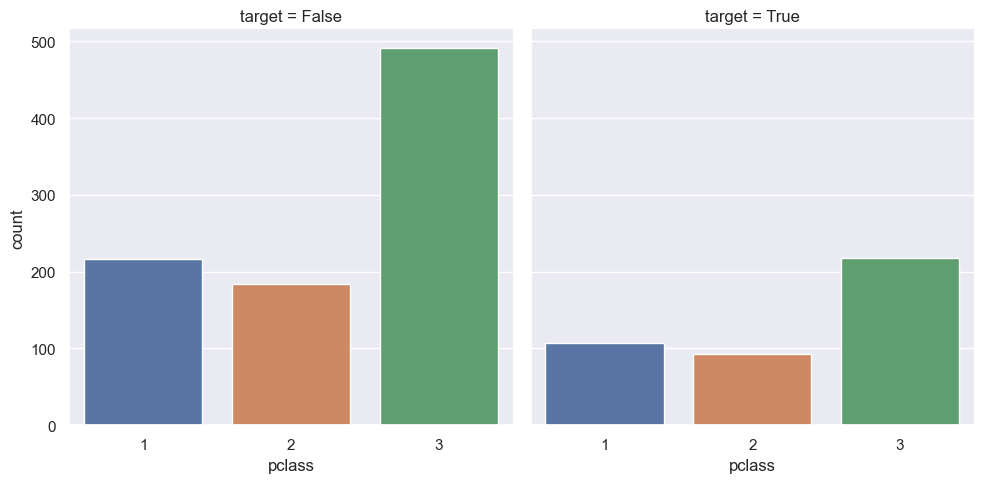

In [51]:
sns.catplot(
    data = comb_raw,
    x = 'pclass',
    col = 'target',
    kind = 'count'
)

This looks mostly OK to me - the balance of third class passengers in the
training dataset is slightly higher in terms of a proportion of the total than
in the target set, but not to such an egregious extent that I think there is
anything to be done about it.

### Age

Similarly, we'll want to make sure that we aren't missing any age data.

In [56]:
sum(pd.isnull(comb_raw.age))

263

It looks like a lot of age data is missing. Probably the best thing to do is to
pick a central tendancy measure (e.g. median) within some grouping variables.
The grouping variables that make sense to me are probably class and sex, though
possibly just picking the median sex values would be good enough.

An even fancier choice would be to use draws from the empirical distribution
of age within groups, or doing a nearest neighbor imputation, or using family
structures to predict age, but median seems like a good choice to start.

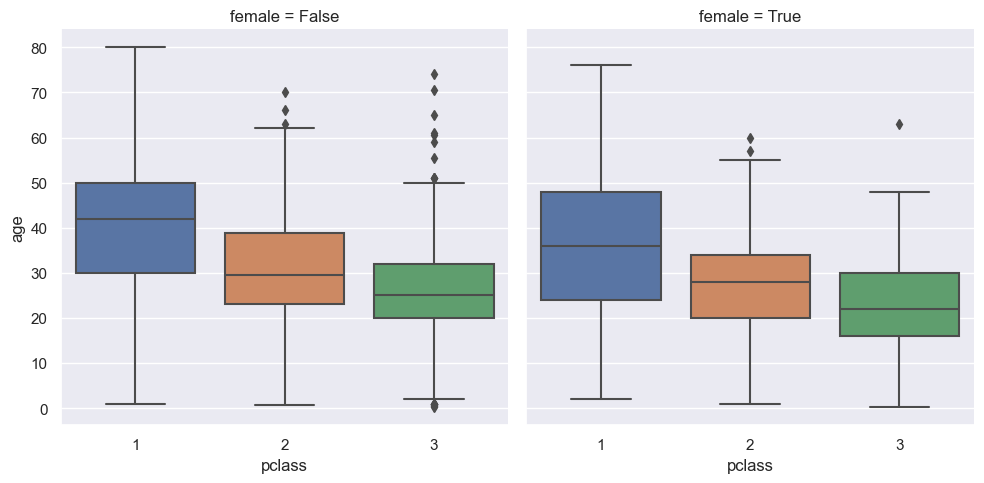

In [57]:
sns.catplot(
    data = comb_raw,
    x = 'pclass',
    y = 'age',
    col = 'female',
    kind = 'box'
)

This reveals interesting age differences in the classes - a trend for upper
class passengers on the titanic to be older. In fact, probably picking median
age within class would be a better choice than within sex, if I had to just
pick a single group.

In [58]:
comb_raw['age'] = comb_raw['age'].fillna(
    comb_raw.groupby(['female', 'pclass'])['age'].transform('median')
)

assert sum(pd.isnull(comb_raw.age)) == 0

### Fare

Next I'll look at the other obviously continuous variable in the dataset - 
`fare`. I imagine this is going to be fairly colinear with `pclass`, and
probably the predictive power won't be very strong. There is no reason to
expect any kind of direct causal correlation between `fare` and survival that is
not contained in information about social class and cabin position on the ship.
It's possible that fare could be helpful for backfilling some other missing
information, though.

In [13]:
sum(pd.isnull(comb_raw['fare']))

1

Just one missing fare value! Who is it?

In [59]:
comb_raw.loc[pd.isnull(comb_raw['fare'])]

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,target,female
1043,1044,None,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,True,False


Mr. Thomas Storey, traveling alone, and there's not any other information about
him, so probably just filling in the 3rd class median fare value is the thing to
do.

In [60]:
comb_raw['fare'] = comb_raw['fare'].fillna(
    comb_raw.groupby(['pclass'])['fare'].transform('median')
)

assert sum(pd.isnull(comb_raw.fare)) == 0

OK now I'll look at the distribution of `fare` by `pclass`.

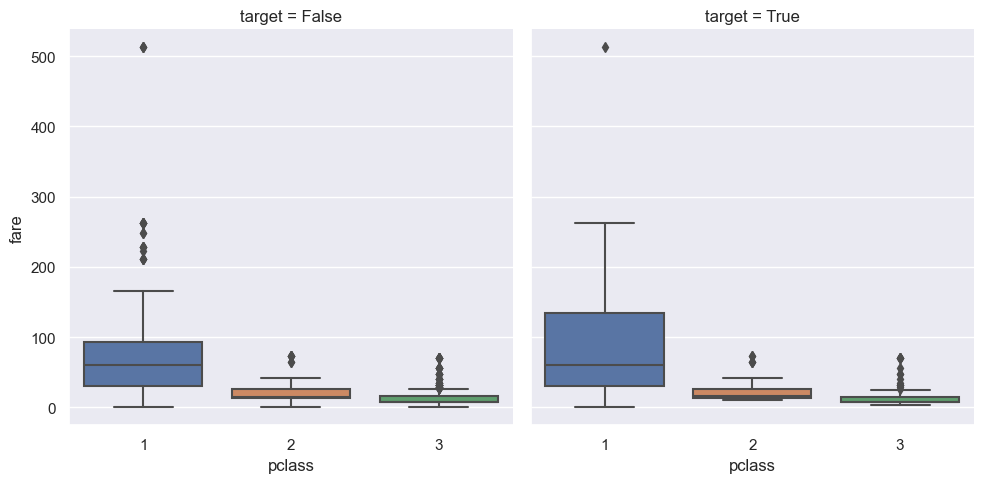

In [61]:
sns.catplot(
    data = comb_raw,
    x = 'pclass',
    y = 'fare',
    col = 'target',
    kind = 'box'
)

### Embarked

The field `embarked` contains information about where the passenger got on the
ship.

In [62]:
sum(pd.isnull(comb_raw.embarked))

2


Two missing values it seems. It makes sense to backfill these with the mode
of the embarkation class.

In [63]:
comb_raw.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

Lools like most people have S as their embarked code, so I'll just backfill
the two missing values with that.

In [323]:
comb_raw['embarked'] = comb_raw['embarked'].fillna('S')

I can't imagine that embarkation location had much direct relationship with
survival, but again, this is possibly helpful in backfilling cabin information.

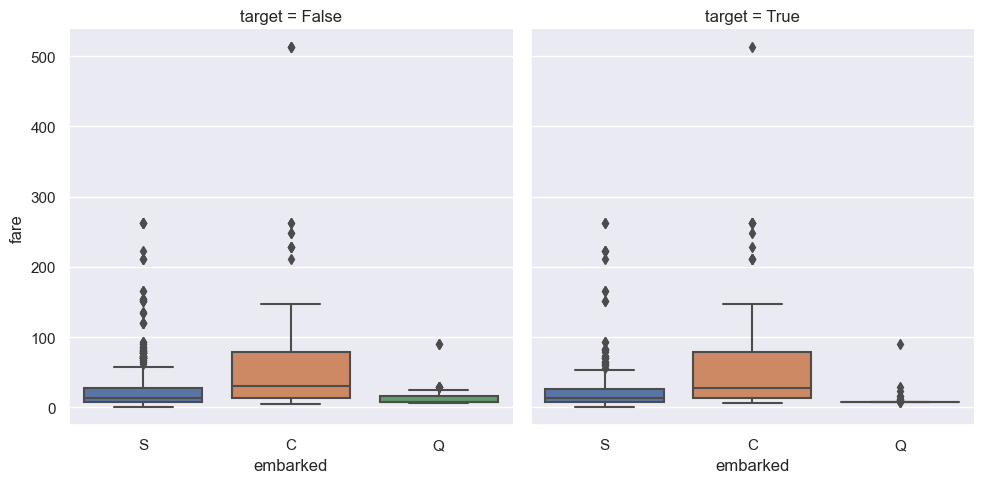

In [64]:
sns.catplot(
    data = comb_raw,
    x = 'embarked',
    y = 'fare',
    col = 'target',
    kind = 'box'
)

### Family names

Next I'll look at the `name` field to see what structure it has and what
information I might be able to glean.

In [65]:
any(pd.isnull(comb_raw.name))

False

No missing name data, so I'll go on to look at how the data are structured.

In [66]:
comb_raw['name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

It ooks like the pattern in the data suggests that this field is recorded in the
pattern `lastname, title first middle`.

It also looks like married women are recorded with the pattern:
`(maidenfirst maidenmiddle maidenlast)` following their husband's name.

There's a lot of information here! With a lot of work, it looks like I should
be able to parse out:

- family name
- title (if applicable)
- maiden family name (if applicable)
- spouse's passenger ID (if applicable)
- sibling passenger ID (if applicable)

I'll just start with parsing out family name, though, since that will be
straightforward. A possible advanced feature engineering step would be to build
a relationship graph of clusters of family association, but that will be a lot
of work, and I am just going to build some basic features to begin with. I'm not
sure how much time I want to put into the titanic problem specifically...

So for now I'll just construct a new variable `family` that will have each
passenger's (married) last name.

In [259]:
comb_raw['family'] = comb_raw['name'].str.split(', ').str[0]

### Parents and Children

Number of parents / number of children on board with each passenger is
encoded in the variable `parch`. I know from the problem data description that
some children were traveling with nannies rather than parents, but that nannies
were not counted in this variable as parents.

In [72]:
any(pd.isnull(comb_raw['parch']))

False

## Ticket

Next there is a `ticket` field that looks like it might contain some information.

In [67]:
any(pd.isnull(comb_raw.ticket))

False

There's no missing data here, so I can look at how the data are structured.

In [68]:
comb_raw.ticket.value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: ticket, Length: 929, dtype: int64

Many tickets seem to have prefixes and numbers, while others only have numbers.
I didn't show all of my exploration here, but it seems like there is variation
in how punctuation is handled within these records, and also some typos. For
example the string "STON" appears a few times while the string "SOTON" appears
a lot. I assume that "STON" is a typo and should be recorded as "SOTON".

I'll write a function to:

- make the values lower case
- strip out punctuation
- change STON -> SOTON
- build a dataframe of ticket prefixes and numbers

In [69]:
def parse_ticket_string(t):
    t_lower = t.lower()
    sub_punct = re.sub(r'[\.\/]', '', t_lower)
    # This looks like a typo
    sub_typo = re.sub(r'ston', 'soton', sub_punct)
    t_split = sub_typo.split()
    if len(t_split) == 1:
        out_dict = {
            'ticket_prefix' : 'none',
            'ticket_number' : t_split[0]
        }
    elif len(t_split) == 2:
        out_dict = {
            'ticket_prefix' : t_split[0],
            'ticket_number' : t_split[1]
        }
    elif len(t_split) == 3:
        out_dict = {
            'ticket_prefix' : t_split[0] + t_split[1],
            'ticket_number' : t_split[2]
        }
    
    return out_dict

ticket_df = pd.DataFrame([parse_ticket_string(t) for t in comb_raw.ticket])
ticket_df


,ticket_prefix,ticket_number
0,a5,21171
1,pc,17599
2,sotono2,3101282
3,none,113803
4,none,373450
...,...,...
1304,a5,3236
1305,pc,17758
1306,sotonoq,3101262
1307,none,359309


In [70]:
ticket_df.ticket_prefix.unique()

array(['a5', 'pc', 'sotono2', 'none', 'pp', 'ca', 'scparis', 'sca4', 'a4',
       'sp', 'soc', 'wc', 'sotonoq', 'wep', 'c', 'sop', 'fa', 'fcc',
       'swpp', 'scow', 'ppp', 'sc', 'scah', 'as', 'scahbasle', 'sopp',
       'fc', 'casoton', 'sca3', 'aq4', 'a2', 'lp', 'aq3'], dtype=object)

In [71]:
ticket_df.ticket_prefix.value_counts()

none         961
pc            92
ca            68
a5            28
sotonoq       25
sotono2       24
scparis       19
wc            15
a4            10
fcc            9
c              8
soc            8
sopp           7
pp             4
scah           4
wep            4
fc             3
sca4           2
swpp           2
ppp            2
sc             2
lp             1
a2             1
aq4            1
sca3           1
casoton        1
fa             1
scahbasle      1
as             1
scow           1
sop            1
sp             1
aq3            1
Name: ticket_prefix, dtype: int64

###

### Cabins

Just from the header it looks like there is a lot of missing cabin data, but
location on the ship could potentially have high predictive power for survival.

In order to make use of this data, though, I will need to find an intelligent
way of imputing 

First I want to parse the data into `deck` and `cabin_number` fields, then I'll
try to backfill the data based on what we know about families and ticket
numbers.

In [312]:
def parse_cabin(cabin):

    if pd.isnull(cabin):
        return {'deck' : 'unk', 'cabin_number' : 'unk'}
    else:
        cabin_split = re.split('(\d+)', cabin)

        if len(cabin_split) == 1:
            return{'deck' : cabin_split[0], 'cabin_number' : 'unk'}
        elif len(cabin_split) >= 2:
            return {'deck' : cabin_split[0], 'cabin_number' : cabin_split[1]}

cabin_df = pd.DataFrame([parse_cabin(c) for c in comb_raw['cabin']])
cabin_df

,deck,cabin_number
0,unk,unk
1,C,85
2,unk,unk
3,C,123
4,unk,unk
...,...,...
1304,unk,unk
1305,C,105
1306,unk,unk
1307,unk,unk


In [313]:
def backfill_cabin():
    # Check to see if the person had family aboard
    # Check to see if we know their cabin numbers
    # If we know family cabin numbers, we backfill with those
    # Check to see if we have cabin numbers for identical ticket holders
    pass

In [330]:
sel = [
    'id', 'target', 'survived', 'family', 'pclass', 'female', 'age',
    'sibsp', 'parch', 'fare', 'embarked'
]

comb = pd.concat([comb_raw.loc[:, sel], cabin_df, ticket_df], axis = 1)
comb

,id,target,survived,family,pclass,female,age,sibsp,parch,fare,embarked,deck,cabin_number,ticket_prefix,ticket_number
0,1,0,0.0,Braund,3,0,22.0,1,0,7.2500,S,unk,unk,a5,21171
1,2,0,1.0,Cumings,1,1,38.0,1,0,71.2833,C,C,85,pc,17599
2,3,0,1.0,Heikkinen,3,1,26.0,0,0,7.9250,S,unk,unk,sotono2,3101282
3,4,0,1.0,Futrelle,1,1,35.0,1,0,53.1000,S,C,123,none,113803
4,5,0,0.0,Allen,3,0,35.0,0,0,8.0500,S,unk,unk,none,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,1,NaN,Spector,3,0,NaN,0,0,8.0500,S,unk,unk,a5,3236
1305,1306,1,NaN,Oliva y Ocana,1,1,39.0,0,0,108.9000,C,C,105,pc,17758
1306,1307,1,NaN,Saether,3,0,38.5,0,0,7.2500,S,unk,unk,sotonoq,3101262
1307,1308,1,NaN,Ware,3,0,NaN,0,0,8.0500,S,unk,unk,none,359309
